# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
print(weather_api_key)

30d75300e79c5705bc37a9b0ed4877b8


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
np.random.seed(42)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | sandnessjoen
Processing Record 8 of Set 1 | tokar
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | punta del este
Processing

Processing Record 38 of Set 4 | flying fish cove
Processing Record 39 of Set 4 | puerto aysen
Processing Record 40 of Set 4 | kingston
Processing Record 41 of Set 4 | berdyansk
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | buka
Processing Record 44 of Set 4 | candido mendes
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | mocimboa
Processing Record 47 of Set 4 | kone
Processing Record 48 of Set 4 | frontera
Processing Record 49 of Set 4 | mount isa
Processing Record 0 of Set 5 | muzayri'
City not found. Skipping...
Processing Record 1 of Set 5 | valle del guamuez
Processing Record 2 of Set 5 | mirny
Processing Record 3 of Set 5 | galliano
Processing Record 4 of Set 5 | golere
Processing Record 5 of Set 5 | kattivakkam
Processing Record 6 of Set 5 | dibba al-hisn
Processing Record 7 of Set 5 | moundou
Processing Record 8 of Set 5 | bargara
City not found. Skipping...
Processing Record 9 of Set 5 | huilong
Processing Record 10 of Set 5

Processing Record 28 of Set 8 | kruisfontein
Processing Record 29 of Set 8 | dogondoutchi
Processing Record 30 of Set 8 | jeremie
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 33 of Set 8 | pangody
Processing Record 34 of Set 8 | bodden town
Processing Record 35 of Set 8 | arraial do cabo
Processing Record 36 of Set 8 | patacamaya
Processing Record 37 of Set 8 | kudat
Processing Record 38 of Set 8 | derbent
Processing Record 39 of Set 8 | santana
Processing Record 40 of Set 8 | iguape
Processing Record 41 of Set 8 | la'ie
Processing Record 42 of Set 8 | bugiri
Processing Record 43 of Set 8 | yuzhno-kurilsk
Processing Record 44 of Set 8 | east london
Processing Record 45 of Set 8 | dankalwa
Processing Record 46 of Set 8 | itamaraca
Processing Record 47 of Set 8 | fomeque
Processing Record 48 of Set 8 | sinazongwe
Processing Record 49 of Set 8 | sisimiut
Processing Record 0 of Set 9 | sanghar
Processing Rec

Processing Record 21 of Set 12 | netley
Processing Record 22 of Set 12 | altamont
Processing Record 23 of Set 12 | imbituba
Processing Record 24 of Set 12 | russkaya polyana
Processing Record 25 of Set 12 | sola
Processing Record 26 of Set 12 | dhidhdhoo
Processing Record 27 of Set 12 | vredendal
Processing Record 28 of Set 12 | mont-dore
Processing Record 29 of Set 12 | sougueur
Processing Record 30 of Set 12 | nishinoomote
Processing Record 31 of Set 12 | eirunepe
Processing Record 32 of Set 12 | tocopilla
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,walvis bay,-22.9575,14.5053,60.10,82,69,7.00,NA,1701042164
1,olonkinbyen,70.9221,-8.7187,34.16,85,100,18.23,SJ,1701042164
2,bethel,41.3712,-73.4140,48.65,82,100,10.36,US,1701041957
3,saint-francois,46.4154,3.9054,31.64,94,100,2.30,FR,1701042040
4,grytviken,-54.2811,-36.5092,38.77,92,99,10.74,GS,1701042021


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,60.10,82,69,7.00,NaN,1701042164
1,olonkinbyen,70.9221,-8.7187,34.16,85,100,18.23,SJ,1701042164
2,bethel,41.3712,-73.4140,48.65,82,100,10.36,US,1701041957
3,saint-francois,46.4154,3.9054,31.64,94,100,2.30,FR,1701042040
4,grytviken,-54.2811,-36.5092,38.77,92,99,10.74,GS,1701042021


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

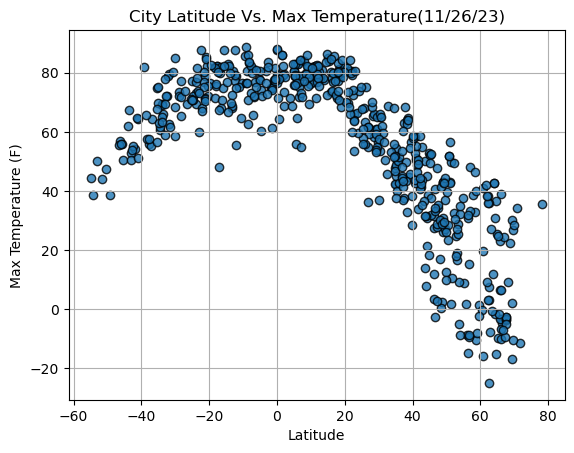

In [33]:
# Build scatter plot for latitude vs. temperature
max_temps = city_data_df["Max Temp"]

plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

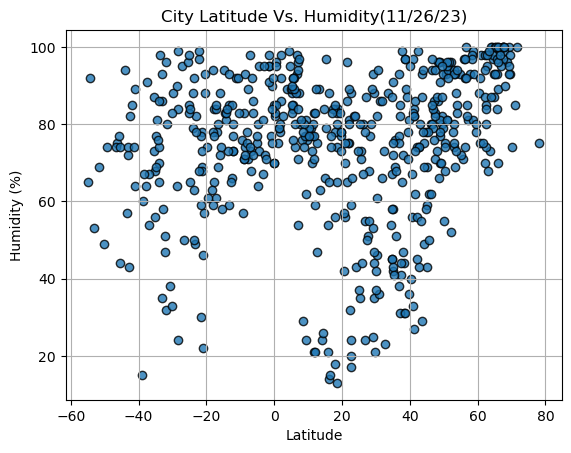

In [34]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

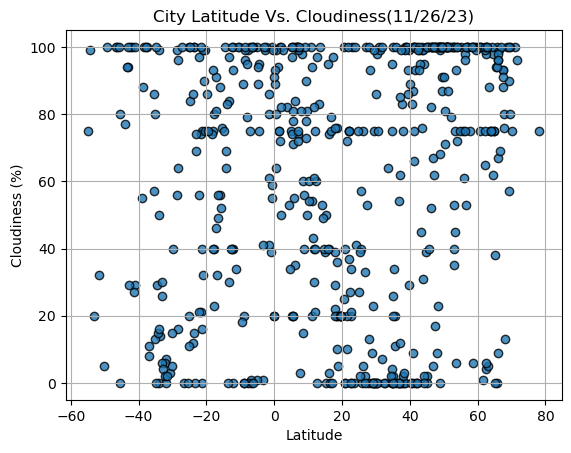

In [35]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

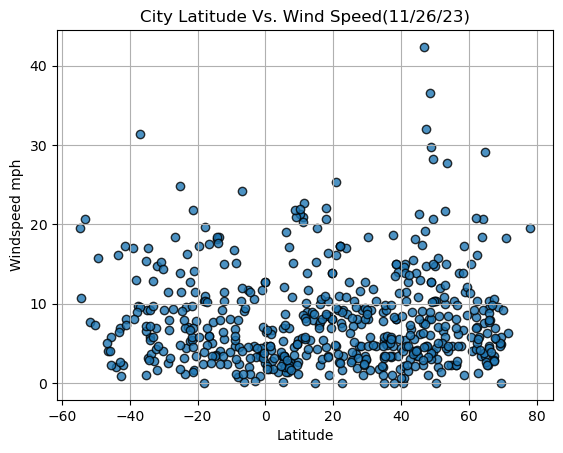

In [37]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,34.16,85,100,18.23,SJ,1701042164
2,bethel,41.3712,-73.4140,48.65,82,100,10.36,US,1701041957
3,saint-francois,46.4154,3.9054,31.64,94,100,2.30,FR,1701042040
6,sandnessjoen,66.0217,12.6316,-3.48,70,9,10.31,NO,1701042166
7,tokar,18.4254,37.7290,81.19,74,36,10.36,SD,1701042167


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,60.10,82,69,7.00,NaN,1701042164
4,grytviken,-54.2811,-36.5092,38.77,92,99,10.74,GS,1701042021
5,port elizabeth,-33.9180,25.5701,69.31,65,0,5.75,ZA,1701042166
12,waitangi,-43.9535,-176.5597,61.83,94,77,1.99,NZ,1701042168
13,puerto natales,-51.7236,-72.4875,43.99,69,32,7.65,CL,1701042168


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8731898303643227


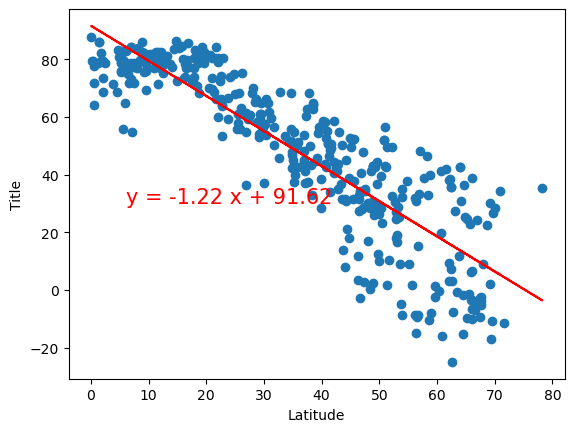

In [44]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.6686437150296595


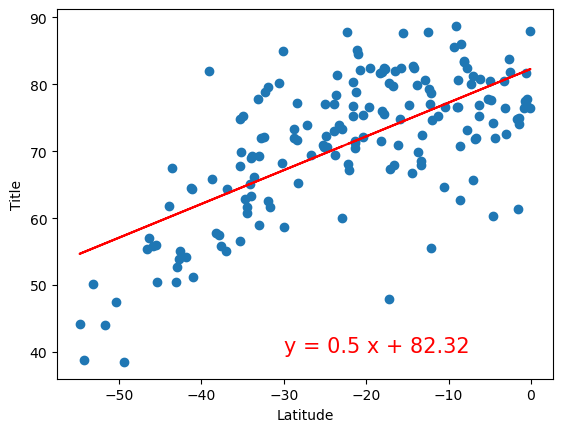

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2606817616407265


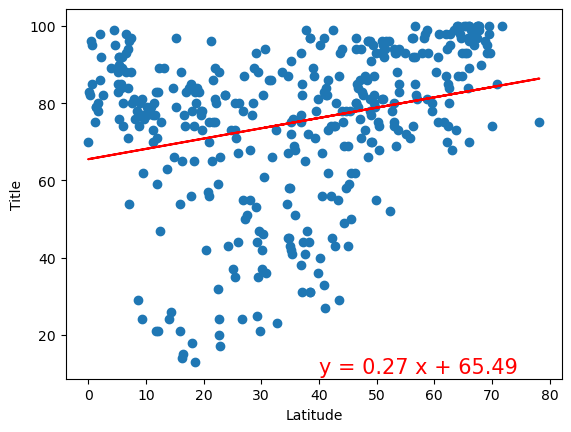

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.2673145038272977


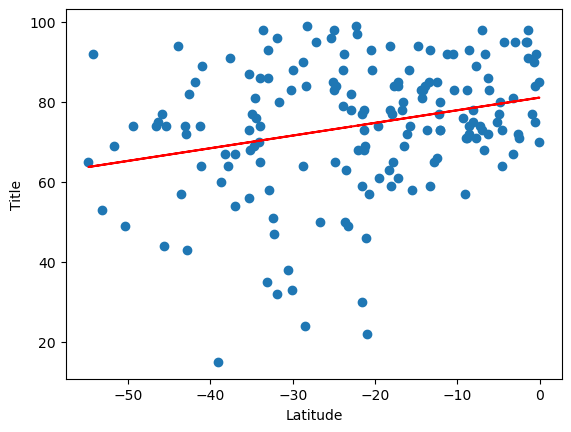

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.204283413043452


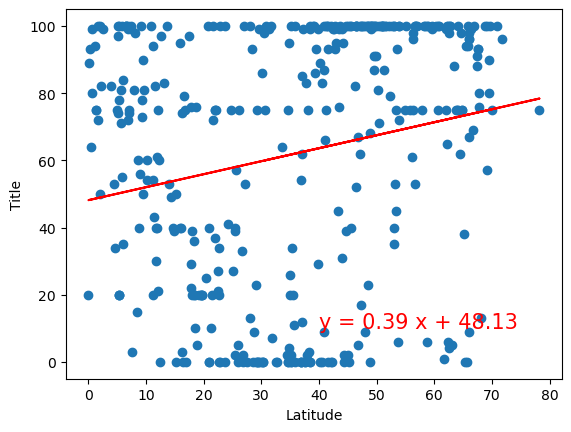

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.10111432005867592


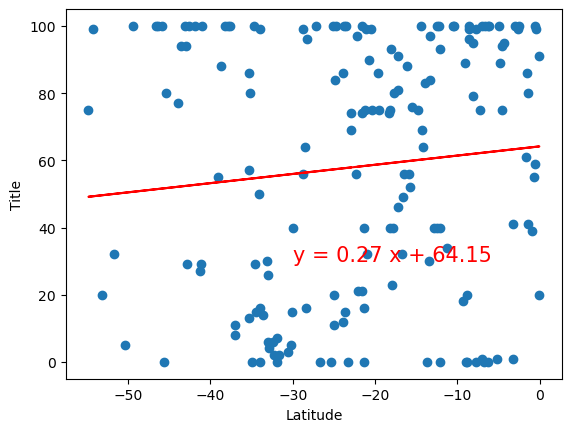

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.08971890154760065


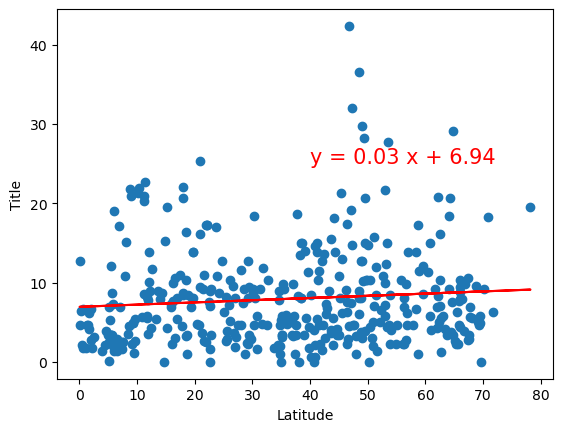

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.17200994993086882


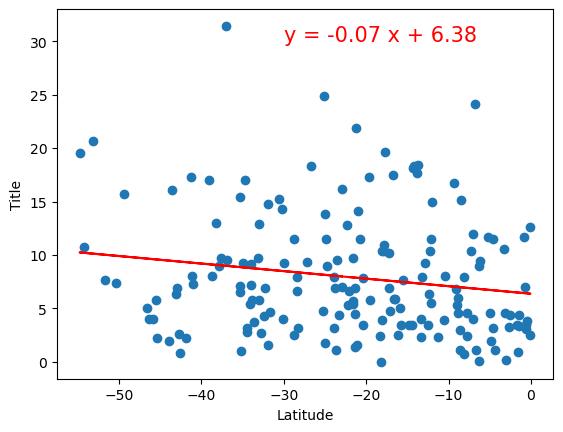

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE